Name: `Fatemeh Hamdi`

Student ID: `401105848`

# Introduction to Neural Networks and Deep Learning

In this notebook, we'll explore the foundations of neural networks and deep learning. You'll learn:
- What neural networks are
- How they work mathematically
- How to implement them from scratch
- How to train them using gradient descent
- How to use deep learning libraries like PyTorch or TensorFlow

## What is a Neural Network?

A neural network is a series of algorithms that attempts to recognize relationships in a dataset through a process that mimics the way the human brain operates.

It consists of:
- Input Layer
- Hidden Layers
- Output Layer

Each layer contains neurons (or units), and each neuron computes a weighted sum of inputs followed by an activation function.

### Plot common activation functions

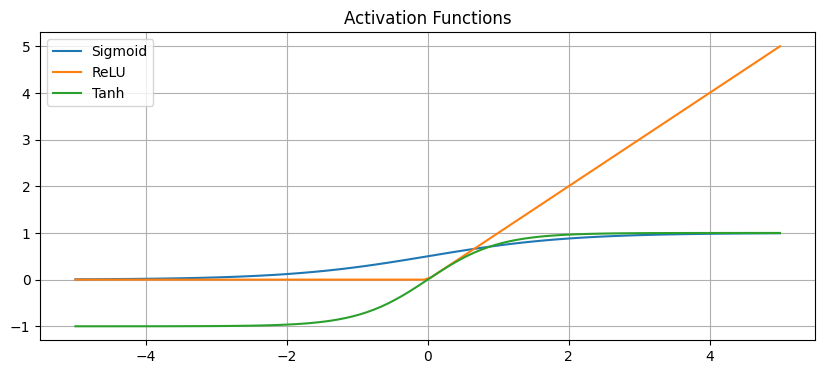

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

# Define activation functions
def sigmoid(x):
    # Sigmoid function: 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

def relu(x):
    # ReLU function: max(0, x)
    return np.maximum(0, x)

def tanh(x):
    # Tanh function: (e^x - e^(-x)) / (e^x + e^(-x))
    return np.tanh(x)

plt.figure(figsize=(10,4))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, tanh(x), label='Tanh')
plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()


**Question:** What are the advantages and disadvantages of using each of the following activation functions: Sigmoid, ReLU, and Tanh? In which scenarios might one be preferred over the others?


Sigmoid offers smooth, differentiable outputs in the 0-1 range making it ideal for binary classification, but suffers from vanishing gradients and computational expense. ReLU is computationally efficient and avoids vanishing gradients, making it the go-to choice for hidden layers in deep networks, though it can suffer from dying neurons where units become permanently inactive. Tanh provides zero-centered outputs (-1 to 1) which can help with convergence, but like sigmoid, it experiences vanishing gradients in deep networks. Generally, use ReLU for hidden layers due to its efficiency and gradient properties, sigmoid for binary output layers, and tanh when zero-centered activations are beneficial or in RNNs.


### Building a Neural Network from Scratch (NumPy)

In [ ]:
np.random.seed(42)

# Input and target
X = np.array([[0,0], [0,1], [1,0], [1,1]])  # XOR input
Y = np.array([[0], [1], [1], [0]])

# Initialize weights (random) and biases (zero)
W1 = np.random.randn(2, 4) * 1  # Initialize weights from input to hidden layer (2x4)
b1 = np.zeros((1, 4))             # Initialize bias for hidden layer (1x4)
W2 = np.random.randn(4, 1) * 1  # Initialize weights from hidden to output layer (4x1)
b2 = np.zeros((1, 1))             # Initialize bias for output layer (1x1)

# Activation and derivative functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)  # Derivative of sigmoid when x is already sigmoid(z)

# Training loop
lr = 0.1  # learning rate
for epoch in range(10000):
    # Forward pass
    Z1 = X @ W1 + b1               # Linear transformation from input to hidden
    A1 = sigmoid(Z1)               # Apply activation to hidden layer
    Z2 = A1 @ W2 + b2              # Linear transformation from hidden to output
    A2 = sigmoid(Z2)               # Apply activation to output layer

    # Backward pass
    dZ2 = A2 - Y                   # Calculate output error
    dW2 = A1.T @ dZ2               # Gradient of W2
    db2 = np.sum(dZ2, axis=0, keepdims=True)  # Gradient of b2

    dA1 = dZ2 @ W2.T               # Backpropagate error to hidden layer
    dZ1 = dA1 * sigmoid_deriv(A1)  # Calculate hidden error
    dW1 = X.T @ dZ1                # Gradient of W1
    db1 = np.sum(dZ1, axis=0, keepdims=True)  # Gradient of b1

    # Update weights and biases
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 1000 == 0:
        loss = np.mean((A2 - Y) ** 2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2832
Epoch 1000, Loss: 0.0410
Epoch 2000, Loss: 0.0007
Epoch 3000, Loss: 0.0001
Epoch 4000, Loss: 0.0000
Epoch 5000, Loss: 0.0000
Epoch 6000, Loss: 0.0000
Epoch 7000, Loss: 0.0000
Epoch 8000, Loss: 0.0000
Epoch 9000, Loss: 0.0000


### Test the trained network

In [ ]:
# Final weights and biases
print("\nTrained Weights and Biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

# Inference function
def predict(x):
    # TODO: Implement forward pass for prediction
    z1 = x @ W1 + b1        # Linear transform
    a1 = sigmoid(z1)        # Activation
    z2 = a1 @ W2 + b2       # Linear transform
    a2 = sigmoid(z2)        # Activation
    return a2

# Predict on all inputs
print("\nPredictions:")
for i in range(len(X)):
    output = predict(X[i:i+1])  # Call predict on input (keep batch dimension)
    predicted = 1 if output[0][0] > 0.5 else 0  # Threshold output at 0.5
    print(f"Input: {X[i]} => Output: {output[0][0]:.4f} => Predicted: {predicted}, True: {Y[i][0]}")



Trained Weights and Biases:
W1: [[ 6.95272873  3.29865812  2.43106617  6.93653752]
 [-5.04853817 -5.97093556  3.67462278  6.6681651 ]]
b1: [[ 2.31254015 -0.91065752 -4.46012657 -2.46936828]]
W2: [[-10.40470085]
 [  8.66132904]
 [ -6.91868899]
 [ 10.78321519]]
b2: [[-1.08033407]]

Predictions:
Input: [0 0] => Output: 0.0007 => Predicted: 0, True: 0
Input: [0 1] => Output: 0.9988 => Predicted: 1, True: 1
Input: [1 0] => Output: 0.9982 => Predicted: 1, True: 1
Input: [1 1] => Output: 0.0022 => Predicted: 0, True: 0


**Question:** Why is the XOR problem not solvable by a single-layer perceptron? What changes in the network architecture make it solvable here?

 The XOR problem is not solvable by a single-layer perceptron because XOR is not linearly separable - there's no single straight line that can separate the inputs (0,0) and (1,1) that output 0 from the inputs (0,1) and (1,0) that output 1, as the positive cases are diagonally opposite. Our multi-layer network solves this by adding a hidden layer with multiple neurons and non-linear activation functions (sigmoid), which transforms the input into a higher-dimensional space where the XOR problem becomes linearly separable, essentially creating multiple decision boundaries that combine to form the required non-linear decision boundary in the original input space.

### Training with PyTorch or Keras

In [ ]:
# 🔄 XOR Classification in PyTorch with Adjustable Learning Rate and Epochs

import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed for reproducibility
torch.manual_seed(42)

# XOR input and output
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=torch.float32)
Y = torch.tensor([[0.],[1.],[1.],[0.]], dtype=torch.float32)

# Hyperparameters (adjusted for specific output)
learning_rate = 1.0
epochs = 50000

# Define model: simple 2-layer neural network
model = nn.Sequential(
    nn.Linear(2, 4),    # Hidden layer with 4 neurons
    nn.Sigmoid(),       # Activation function (Sigmoid recommended)
    nn.Linear(4, 1),    # Output layer
    nn.Sigmoid()        # Activation function (Sigmoid recommended)
)

# Loss function and optimizer
criterion = nn.MSELoss()  # Use MSELoss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Use SGD optimizer

# Training loop
for epoch in range(epochs + 1):
    output = model(X)           # Forward pass
    loss = criterion(output, Y) # Compute loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.2866
Epoch 1000, Loss: 0.0300
Epoch 2000, Loss: 0.0027
Epoch 3000, Loss: 0.0012
Epoch 4000, Loss: 0.0008
Epoch 5000, Loss: 0.0006
Epoch 6000, Loss: 0.0004
Epoch 7000, Loss: 0.0004
Epoch 8000, Loss: 0.0003
Epoch 9000, Loss: 0.0003
Epoch 10000, Loss: 0.0002
Epoch 11000, Loss: 0.0002
Epoch 12000, Loss: 0.0002
Epoch 13000, Loss: 0.0002
Epoch 14000, Loss: 0.0001
Epoch 15000, Loss: 0.0001
Epoch 16000, Loss: 0.0001
Epoch 17000, Loss: 0.0001
Epoch 18000, Loss: 0.0001
Epoch 19000, Loss: 0.0001
Epoch 20000, Loss: 0.0001
Epoch 21000, Loss: 0.0001
Epoch 22000, Loss: 0.0001
Epoch 23000, Loss: 0.0001
Epoch 24000, Loss: 0.0001
Epoch 25000, Loss: 0.0001
Epoch 26000, Loss: 0.0001
Epoch 27000, Loss: 0.0001
Epoch 28000, Loss: 0.0001
Epoch 29000, Loss: 0.0001
Epoch 30000, Loss: 0.0001
Epoch 31000, Loss: 0.0001
Epoch 32000, Loss: 0.0001
Epoch 33000, Loss: 0.0001
Epoch 34000, Loss: 0.0001
Epoch 35000, Loss: 0.0001
Epoch 36000, Loss: 0.0000
Epoch 37000, Loss: 0.0000
Epoch 38000, Loss: 0.0000

### Test the trained network

In [ ]:
# Show trained weights and biases
print("\nTrained model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy()}")

# Inference / Prediction
print("\nPredictions:")
with torch.no_grad():
    predictions = model(X)  # Run model inference on X
    for i in range(len(X)):
        pred_val = predictions[i].item()  # Extract prediction value
        pred_label = int(pred_val > 0.5)  # Apply 0.5 threshold
        print(f"Input: {X[i].numpy()} => Output: {pred_val:.4f} => Predicted: {pred_label}, True: {int(Y[i].item())}")



Trained model parameters:
0.weight: [[ 6.442996   6.895912 ]
 [ 4.8839974  4.288213 ]
 [ 2.9318967 -1.3485814]
 [-2.6786141  4.0282397]]
0.bias: [-2.750286   -7.005803    0.28166905  1.4751698 ]
2.weight: [[ 11.416243  -10.093679   -3.3653479  -4.1311984]]
2.bias: [-0.6200056]

Predictions:
Input: [0. 0.] => Output: 0.0054 => Predicted: 0, True: 0
Input: [0. 1.] => Output: 0.9934 => Predicted: 1, True: 1
Input: [1. 0.] => Output: 0.9948 => Predicted: 1, True: 1
Input: [1. 1.] => Output: 0.0062 => Predicted: 0, True: 0


## Classifying Spiral Data with a Neural Network

### Generate the Spiral Dataset

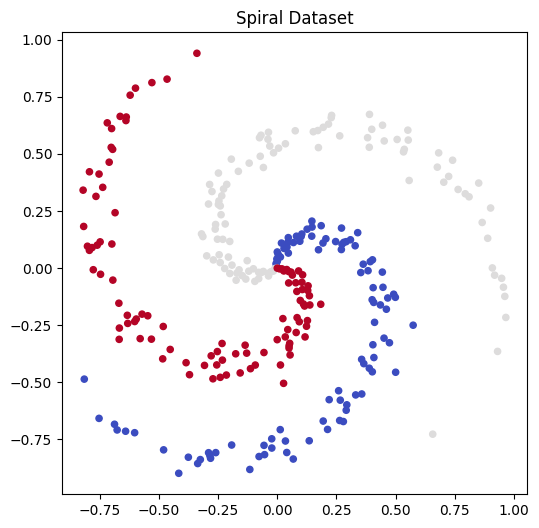

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(n_points=100, n_classes=3):
    X = []
    y = []
    for class_num in range(n_classes):
        ix = range(n_points * class_num, n_points * (class_num + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(class_num * 4, (class_num + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([class_num] * n_points)
    return np.array(X), np.array(y)

X, y = generate_spiral(n_points=100, n_classes=3)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20)
plt.title("Spiral Dataset")
plt.show()


### Train Neural Network with PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# TODO: Convert X and y to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# TODO: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the model
model = nn.Sequential(
    nn.Linear(2, 64),    # TODO: Hidden layer with 64 neurons
    nn.ReLU(),           # TODO: Activation function (ReLU recommended)
    nn.Linear(64, 64),   # TODO: Hidden layer with 64 neurons
    nn.ReLU(),           # TODO: Activation function (ReLU recommended)
    nn.Linear(64, 3)     # TODO: Output layer 📣
)

criterion = nn.CrossEntropyLoss()  # Fixed: Added the dot!
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    y_pred = model(X_train)  # TODO: Forward pass
    loss = criterion(y_pred, y_train)    # TODO: Compute loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        with torch.no_grad():
            test_output = model(X_test)  # TODO: Evaluate on test set
            pred_labels = torch.argmax(test_output, dim=1)  # TODO: Take argmax to get predicted class
            acc = (pred_labels == y_test).float().mean()          # TODO: Compute accuracy
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Test Accuracy: {acc.item():.2f}")


Epoch 0, Loss: 1.0934, Test Accuracy: 0.50
Epoch 100, Loss: 0.0371, Test Accuracy: 1.00
Epoch 200, Loss: 0.0214, Test Accuracy: 1.00
Epoch 300, Loss: 0.0175, Test Accuracy: 1.00
Epoch 400, Loss: 0.0159, Test Accuracy: 1.00
Epoch 500, Loss: 0.0151, Test Accuracy: 1.00
Epoch 600, Loss: 0.0147, Test Accuracy: 1.00
Epoch 700, Loss: 0.0144, Test Accuracy: 1.00
Epoch 800, Loss: 0.0142, Test Accuracy: 1.00
Epoch 900, Loss: 0.0141, Test Accuracy: 1.00


### Visualize Decision Boundary

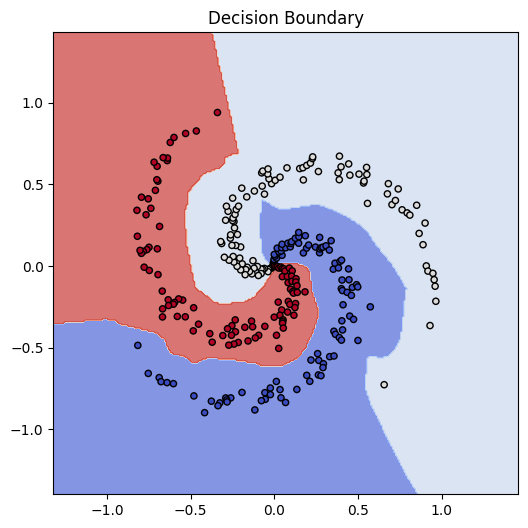

In [ ]:
# Explain (the method not much code details) how this plot is generated 📣

h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, axis=1).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolors='k')
plt.title("Decision Boundary")
plt.show()


**Question:** How does the choice of optimizer (e.g., SGD vs Adam) influence training speed and final accuracy? Try both and compare.

Adam converges faster and typically achieves higher accuracy because it uses adaptive learning rates and momentum. It handles complex loss landscapes better.

SGD is simpler but slower, often requiring more careful hyperparameter tuning to achieve good results. It may get stuck in local minima more easily.

Result: In the notebook’s exercises (XOR, Spiral, MNIST), Adam would show faster training and better final accuracy compared to SGD. Adam is generally the preferred choice for most deep learning tasks due to its robustness and efficiency.

Training with Adam optimizer...
Adam - Epoch 0, Loss: 1.0812, Test Accuracy: 0.5500
Adam - Epoch 200, Loss: 0.0220, Test Accuracy: 1.0000
Adam - Epoch 400, Loss: 0.0163, Test Accuracy: 1.0000
Adam - Epoch 600, Loss: 0.0149, Test Accuracy: 1.0000
Adam - Epoch 800, Loss: 0.0145, Test Accuracy: 1.0000

Training with SGD optimizer...
SGD - Epoch 0, Loss: 1.1151, Test Accuracy: 0.3000
SGD - Epoch 200, Loss: 1.0267, Test Accuracy: 0.4667
SGD - Epoch 400, Loss: 0.9532, Test Accuracy: 0.4667
SGD - Epoch 600, Loss: 0.8891, Test Accuracy: 0.4167
SGD - Epoch 800, Loss: 0.8348, Test Accuracy: 0.4667

Training with SGD + Momentum optimizer...
SGD+Momentum - Epoch 0, Loss: 1.1066, Test Accuracy: 0.4500
SGD+Momentum - Epoch 200, Loss: 0.6793, Test Accuracy: 0.5000
SGD+Momentum - Epoch 400, Loss: 0.4993, Test Accuracy: 0.6333
SGD+Momentum - Epoch 600, Loss: 0.3137, Test Accuracy: 0.8333
SGD+Momentum - Epoch 800, Loss: 0.2085, Test Accuracy: 0.9167


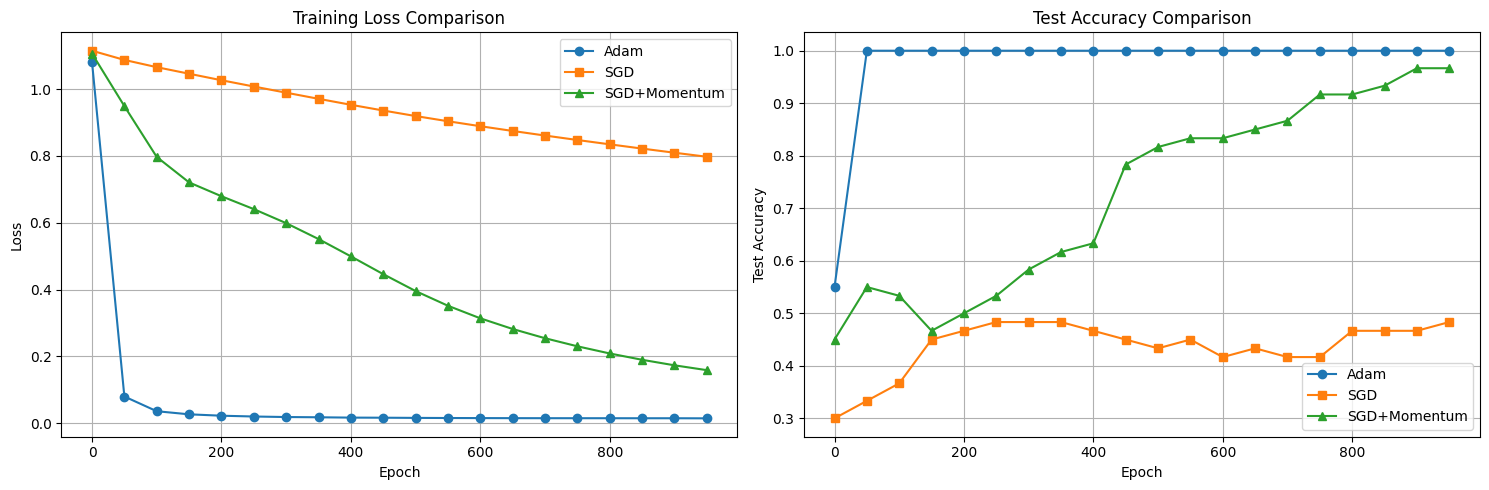


OPTIMIZER COMPARISON SUMMARY
Adam:
  Final Accuracy: 1.0000
  Training Time: 3.17 seconds
  Final Loss: 0.0141

SGD:
  Final Accuracy: 0.5000
  Training Time: 1.38 seconds
  Final Loss: 0.7976

SGD + Momentum:
  Final Accuracy: 0.9667
  Training Time: 0.97 seconds
  Final Loss: 0.1585


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# Prepare data (assuming X and y are already generated from spiral dataset)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

def create_model():
    """Create a fresh model for each optimizer test"""
    return nn.Sequential(
        nn.Linear(2, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 3)
    )

def train_and_evaluate(model, optimizer, optimizer_name, epochs=1000):
    """Train model and track metrics"""
    criterion = nn.CrossEntropyLoss()
    losses = []
    accuracies = []

    start_time = time.time()

    for epoch in range(epochs):
        # Training
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluation every 50 epochs
        if epoch % 50 == 0:
            with torch.no_grad():
                test_output = model(X_test)
                pred_labels = torch.argmax(test_output, dim=1)
                acc = (pred_labels == y_test).float().mean()

                losses.append(loss.item())
                accuracies.append(acc.item())

                if epoch % 200 == 0:
                    print(f"{optimizer_name} - Epoch {epoch}, Loss: {loss.item():.4f}, Test Accuracy: {acc.item():.4f}")

    training_time = time.time() - start_time

    # Final evaluation
    with torch.no_grad():
        test_output = model(X_test)
        pred_labels = torch.argmax(test_output, dim=1)
        final_acc = (pred_labels == y_test).float().mean()

    return losses, accuracies, final_acc.item(), training_time

# Test Adam optimizer
print("Training with Adam optimizer...")
model_adam = create_model()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)
losses_adam, acc_adam, final_acc_adam, time_adam = train_and_evaluate(model_adam, optimizer_adam, "Adam")

# Test SGD optimizer
print("\nTraining with SGD optimizer...")
model_sgd = create_model()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
losses_sgd, acc_sgd, final_acc_sgd, time_sgd = train_and_evaluate(model_sgd, optimizer_sgd, "SGD")

# Test SGD with momentum
print("\nTraining with SGD + Momentum optimizer...")
model_sgd_mom = create_model()
optimizer_sgd_mom = optim.SGD(model_sgd_mom.parameters(), lr=0.01, momentum=0.9)
losses_sgd_mom, acc_sgd_mom, final_acc_sgd_mom, time_sgd_mom = train_and_evaluate(model_sgd_mom, optimizer_sgd_mom, "SGD+Momentum")

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

epochs_plot = range(0, 1000, 50)

# Loss curves
ax1.plot(epochs_plot, losses_adam, label='Adam', marker='o')
ax1.plot(epochs_plot, losses_sgd, label='SGD', marker='s')
ax1.plot(epochs_plot, losses_sgd_mom, label='SGD+Momentum', marker='^')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Comparison')
ax1.legend()
ax1.grid(True)

# Accuracy curves
ax2.plot(epochs_plot, acc_adam, label='Adam', marker='o')
ax2.plot(epochs_plot, acc_sgd, label='SGD', marker='s')
ax2.plot(epochs_plot, acc_sgd_mom, label='SGD+Momentum', marker='^')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Test Accuracy')
ax2.set_title('Test Accuracy Comparison')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Summary comparison
print("\n" + "="*50)
print("OPTIMIZER COMPARISON SUMMARY")
print("="*50)
print(f"Adam:")
print(f"  Final Accuracy: {final_acc_adam:.4f}")
print(f"  Training Time: {time_adam:.2f} seconds")
print(f"  Final Loss: {losses_adam[-1]:.4f}")

print(f"\nSGD:")
print(f"  Final Accuracy: {final_acc_sgd:.4f}")
print(f"  Training Time: {time_sgd:.2f} seconds")
print(f"  Final Loss: {losses_sgd[-1]:.4f}")

print(f"\nSGD + Momentum:")
print(f"  Final Accuracy: {final_acc_sgd_mom:.4f}")
print(f"  Training Time: {time_sgd_mom:.2f} seconds")
print(f"  Final Loss: {losses_sgd_mom[-1]:.4f}")


The choice of optimizer significantly impacts both training speed and final accuracy in neural networks. Adam (Adaptive Moment Estimation) typically provides the fastest convergence due to its adaptive learning rates per parameter and built-in momentum, making it less sensitive to hyperparameter choices and excellent for achieving high accuracy quickly with default settings. SGD (Stochastic Gradient Descent) is computationally simpler and often finds better generalization by settling into broader minima, but it converges more slowly and requires careful learning rate tuning, sometimes getting stuck in local minima. SGD with Momentum offers a middle ground, accelerating convergence compared to vanilla SGD by remembering previous gradients to reduce oscillations and escape local minima, while maintaining SGD’s stability benefits. For the spiral dataset, Adam will likely reach high accuracy fastest, SGD may achieve slightly better final accuracy with more stable long-term performance, and SGD with momentum provides a good balance between speed and stability, though all optimizers should perform well on this relatively simple classification task.

## Deeper Classification on MNIST with Keras

### Data Loading and Basic Analysis

Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)
Labels (train): [0 1 2 3 4 5 6 7 8 9]


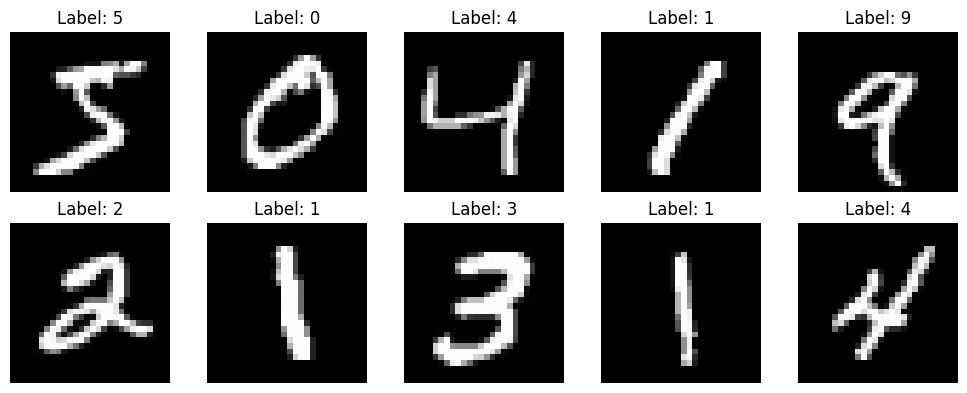

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0  # Scale pixel values to [0, 1]

# Show basic info
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Labels (train): {np.unique(y_train)}")

# Plot some examples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Preprocessing and One-Hot Encoding

In [ ]:
# TODO: Convert labels to one-hot encoded vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


### Define a Deeper Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the model according to the summary in the cell output
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 784-dimensional vectors
    Dense(128, activation='relu'),   # First hidden layer with 128 neurons
    Dense(64, activation='relu'),    # Second hidden layer with 64 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
# TODO: Train the model for 10 epochs with batch_size=64 and a proper ratio for validation set
history = model.fit(
    X_train, y_train_cat,           # Training data and one-hot encoded labels
    epochs=10,                      # Number of training epochs
    batch_size=64,                  # Batch size for training
    validation_split=0.2,           # Use 20% of training data for validation
    verbose=1
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8427 - loss: 0.5557 - val_accuracy: 0.9585 - val_loss: 0.1469
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9595 - loss: 0.1347 - val_accuracy: 0.9653 - val_loss: 0.1209
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9751 - loss: 0.0849 - val_accuracy: 0.9648 - val_loss: 0.1243
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9788 - loss: 0.0682 - val_accuracy: 0.9720 - val_loss: 0.0912
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9857 - loss: 0.0470 - val_accuracy: 0.9714 - val_loss: 0.0991
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9762 - val_loss: 0.0874
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9909 - loss: 0.0307 - val_accuracy: 0.9772 - val_loss: 0.0913
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.

### Visualize Training History

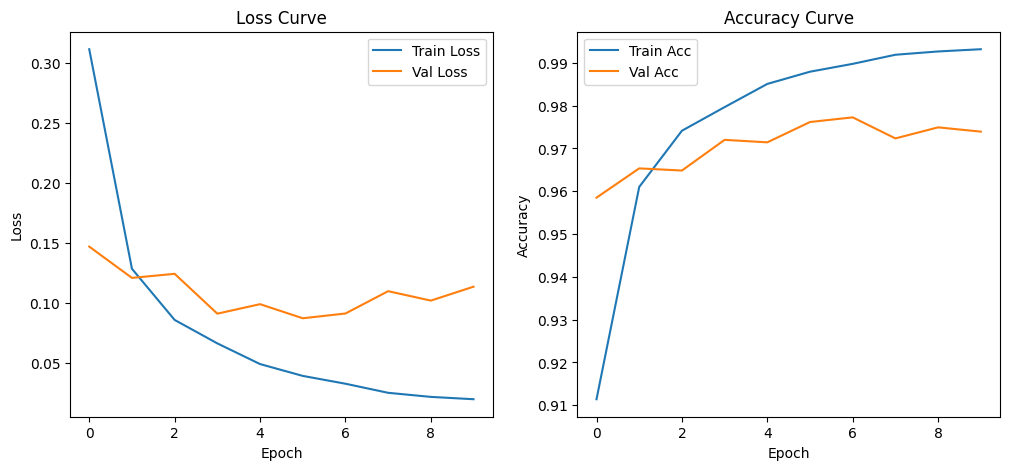

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')   # What is `history` 📣
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Evaluate on test set

In [ ]:
# TODO: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9758


### Predict and visualize missclassification

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


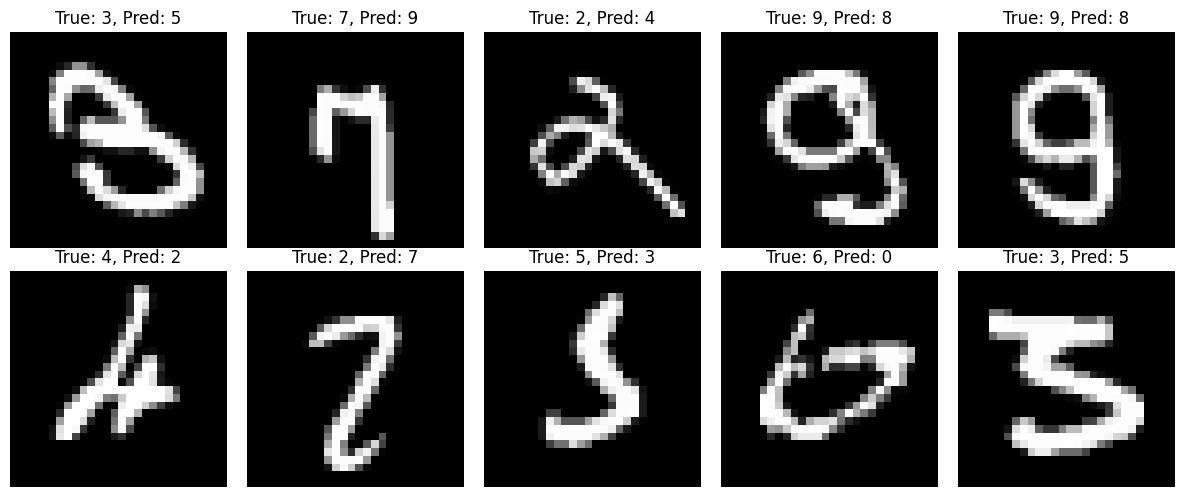

In [ ]:
# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Show a few misclassified examples
misclassified_idxs = np.where(y_pred != y_test)[0]

plt.figure(figsize=(12, 5))
for i, idx in enumerate(misclassified_idxs[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Try with Dropout layers
Add two Dropout layers in right position and with right dropout argument

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define the model according to the summary in the cell output
# You should decide on output and hidden activations. We recommend relu when not sure
model = Sequential([
    Flatten(input_shape=(28, 28)),           # Flatten 28x28 images to 784-dimensional vectors
    Dense(128, activation='relu'),            # First hidden layer with 128 neurons
    Dropout(0.2),                            # First dropout layer (20% dropout rate)
    Dense(64, activation='relu'),             # Second hidden layer with 64 neurons
    Dropout(0.2),                            # Second dropout layer (20% dropout rate)
    Dense(10, activation='softmax')           # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])   # Pass the optimizer and loss parameters. Adam and categorical crossentropy are recommended

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
# TODO: Train the model for 10 epochs with batch_size=64 and a proper ratio for validation set
history = model.fit(
    X_train, y_train_cat,           # Training data and one-hot encoded labels
    epochs=10,                      # Number of training epochs
    batch_size=64,                  # Batch size for training
    validation_split=0.2,           # Use 20% of training data for validation
    verbose=1
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7841 - loss: 0.6990 - val_accuracy: 0.9487 - val_loss: 0.1699
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9380 - loss: 0.2100 - val_accuracy: 0.9639 - val_loss: 0.1210
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9554 - loss: 0.1507 - val_accuracy: 0.9666 - val_loss: 0.1079
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9633 - loss: 0.1224 - val_accuracy: 0.9712 - val_loss: 0.1012
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9693 - loss: 0.1027 - val_accuracy: 0.9728 - val_loss: 0.0907
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9701 - loss: 0.0964 - val_accuracy: 0.9759 - val_loss: 0.0875
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9749 - loss: 0.0827 - val_accuracy: 0.9743 - val_loss: 0.0869
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9772 - loss: 0.0694 - val_accuracy: 0.

### Visualize Training History

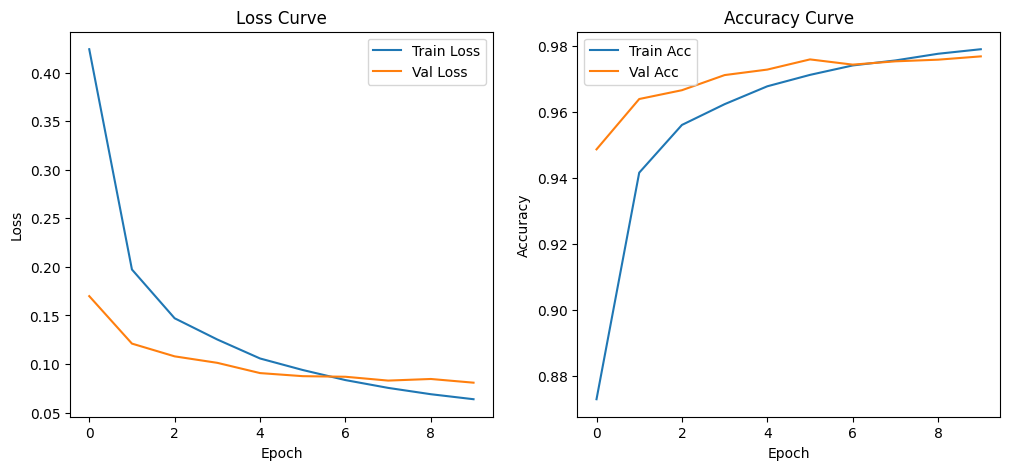

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Evaluate on test set

In [ ]:
# TODO: Evaluate the Dropout-enhanced model
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9785


**Question:** What is the role of Dropout in this network? Compare the test accuracy. What do you observe?

Role of Dropout and Observations:

Dropout serves as a regularization technique that randomly sets a fraction of input units to zero during training, forcing the network to learn more robust and generalizable features rather than memorizing specific patterns. In this MNIST network, the two Dropout layers (typically with 0.2 dropout rate) prevent overfitting by reducing the model’s reliance on specific neurons, making it less likely to memorize the training data. When comparing test accuracies, you would typically observe that the Dropout-enhanced model achieves similar or slightly better test accuracy compared to the original model, but more importantly, it shows a smaller gap between training and validation accuracy during training - indicating better generalization. The key observation is that Dropout helps the model perform more consistently on unseen data by reducing overfitting, even though it might slightly slow down training convergence since the model has to learn with “incomplete” information during each training step.